In [9]:
import json
import pandas as pd
import numpy as np
import os

In [10]:
with open(r'D:\Browser Downloads\tmp2jmy8871 (1)', 'r', encoding='utf8') as f:
    json_str = f.readlines()[0]
res = json.loads(json_str, encoding='utf8')

In [11]:
res[0]

{'original_text': ' جاد لك شو اعملك بنتك بتتاكل اكل دخيل الي خلئها',
 'processed_texts': ' جاد لك شو اعملك بنتك بتتاكل اكل دخيل الي خلءها',
 'y': 'SYR',
 'yhat': 'SYR'}

In [12]:
d = {'text_len' : [len(row['processed_texts']) if len(row['processed_texts']) <= 300 else 300  for row in res], 'correctly_predicted': [row['y'] == row['yhat'] for row in res]}

In [13]:
df = pd.DataFrame(data=d)

In [27]:

df.sample(5)

,text_len,correctly_predicted,text_len_bin
12369,21,True,30
6923,30,True,30
10268,25,True,30
4245,101,True,150
1860,93,True,100


In [15]:
import seaborn as sns

D:\ProgramFiles\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


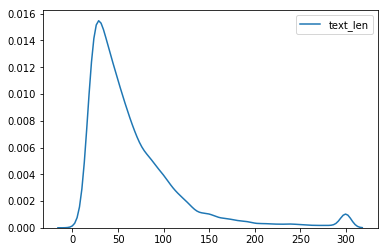

In [21]:
sns.kdeplot(df['text_len'])

In [39]:
def bin_text_len(text_len):
    if text_len <= 30:
        return 30
    if text_len <= 40:
        return 40
    if text_len <= 50:
        return 50
    if text_len <= 60:
        return 60
    if text_len <= 80:
        return 80
    if text_len <= 100:
        return 100
    if text_len <= 150:
        return 150
    if text_len <= 300:
        return 300

df['text_len_bin'] = df.apply(lambda x : bin_text_len(x['text_len']), axis=1)
df.groupby('text_len_bin').agg([np.mean, len])

text_len       correctly_predicted      
                    mean   len                mean   len
text_len_bin                                            
30             23.191195  3112            0.867609  3112
40             35.342160  1926            0.886293  1926
50             45.355388  1587            0.904852  1587
60             55.314043  1296            0.921296  1296
80             69.712071  1806            0.938538  1806
100            89.882072  1255            0.935458  1255
150           119.371134  1358            0.954345  1358
300           222.408590   908            0.965859   908